<a href="https://colab.research.google.com/github/Anushka-GA/AI-ML-Month/blob/main/heart_stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing** **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance

## **Opening the dataset**

It is important to understand the dataset before going deeper into the subsequent process. Here, we will explore the information about the dataset, such as number of samples, presence of missing values, class imbalance, etc.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.drop(['ever_married','work_type','Residence_type','smoking_status'],axis=1)

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,228.69,36.6,1
1,51676,Female,61.0,0,0,202.21,NaN,1
2,31112,Male,80.0,0,1,105.92,32.5,1
3,60182,Female,49.0,0,0,171.23,34.4,1
4,1665,Female,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,83.75,NaN,0
5106,44873,Female,81.0,0,0,125.20,40.0,0
5107,19723,Female,35.0,0,0,82.99,30.6,0
5108,37544,Male,51.0,0,0,166.29,25.6,0


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
miss_val = data.isnull().sum()/len(data)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("# Missing values in variable smoking_status\t: {:.2f}%".format(miss_val['smoking_status']))
print("Data shape: {}".format(data.shape))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
# Missing values in variable bmi		: 3.93%
# Missing values in variable smoking_status	: 0.00%
Data shape: (5110, 12)


## Handling Missing Data


In [ ]:
# Safely disable new warning with the chained assignment.
pd.options.mode.chained_assignment = None  # default='warn'
# replace missing values in variable 'bmi' with its mean
data['bmi']=data['bmi'].fillna(data['bmi'].mean())
# remove (drop) data associated with missing values in variable 'smoking_status'
clean_data = data[data['smoking_status'].notnull()]
# drop variable 'id'
clean_data.drop(columns='id',axis=1,inplace=True)
# validate there's no more missing values
miss_val = clean_data.isnull().sum()/len(clean_data)*100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("# Missing values in variable 'smoking_status'\t: {}".format(miss_val['smoking_status']))
print("Shape of data without missing values: {}".format(clean_data.shape))

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
# Missing values in variable 'smoking_status'	: 0.0
Shape of data without missing values: (5110, 11)


## Changing Category to Numerical Values

Since some variables are categorical, we have to convert them into numerical variables.

In [ ]:
print("Unique 'gender': {}".format(clean_data['gender'].unique()))
print("Unique 'ever_married': {}".format(clean_data['ever_married'].unique()))
print("Unique 'work_type': {}".format(clean_data['work_type'].unique()))
print("Unique 'Residence_type': {}".format(clean_data['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(clean_data['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
# create encoder for each categorical variable
label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()


In [ ]:
clean_data['gender'] = label_gender.fit_transform(clean_data['gender'])
clean_data['ever_married'] = label_married.fit_transform(clean_data['ever_married'])
clean_data['work_type']= label_work.fit_transform(clean_data['work_type'])
clean_data['Residence_type']= label_residence.fit_transform(clean_data['Residence_type'])
clean_data['smoking_status']= label_smoking.fit_transform(clean_data['smoking_status'])
with pd.option_context('expand_frame_repr', False):
    print(clean_data.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level        bmi  smoking_status  stroke
0       1  67.0             0              1             1          2               1             228.69  36.600000               1       1
1       0  61.0             0              0             1          3               0             202.21  28.893237               2       1
2       1  80.0             0              1             1          2               0             105.92  32.500000               2       1
3       0  49.0             0              0             1          2               1             171.23  34.400000               3       1
4       0  79.0             1              0             1          3               0             174.12  24.000000               2       1


## **Inter**-**feature** **Correlation**


It is sometimes useful to measure the inter-feature correlation. If we find that a feature is highly correlated with the class (target), it could be an indication that this feature is informative about the class. In addition, if a feature is highly correlated with other features, we could remove one of them thus reducing the complexity while potentially improving the model's learning.



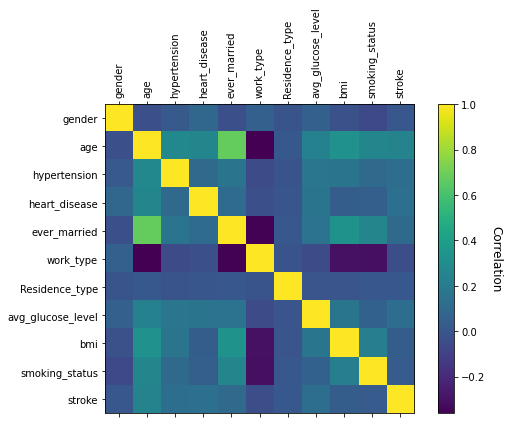

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(clean_data.corr())
ax.set_xticks(np.arange(clean_data.shape[1]))
ax.set_yticks(np.arange(clean_data.shape[1]))
ax.set_xticklabels(clean_data.columns,rotation=90)
ax.set_yticklabels(clean_data.columns)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()

## **Histogram** **of** **Features**

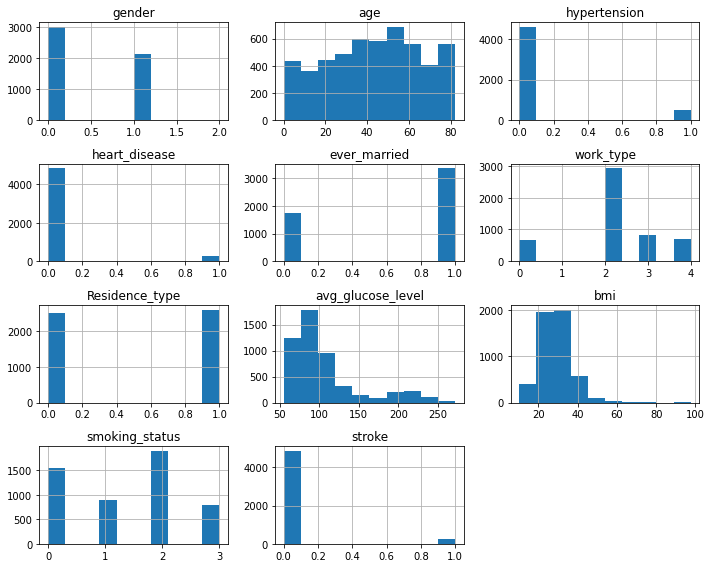

In [ ]:
fig = clean_data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

# Class (Target) Distribution

Now, let's take a look at the distribution of class (target). If the class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class.



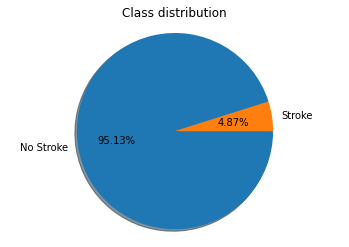

# samples associated with no stroke: 4861
# samples associated with stroke: 249


In [ ]:
class_occur = clean_data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

## Data Preprocessing

**Handle** **Imbalanced** **Class**

There are several techniques that can be used to handle highly imbalanced class. This article nicely summarises those different techniques. In this notebook, we are going to use one of oversampling technique called Synthetic Minority Oversampling Technique (SMOTE), by synthesising new samples from the minority class to have the same number of samples as the majority class (illustrated in figure below). Oversampling technique is chosen because we do not want to loose significant amount of information (97.88%) as if we use undersampling technique.

In [ ]:
# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(clean_data.loc[:,clean_data.columns!='stroke'], clean_data['stroke'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (9722, 10)
Shape of y: (9722,)


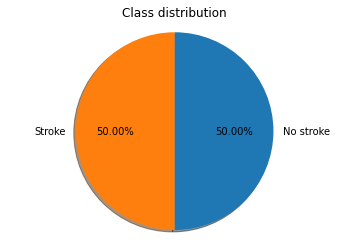

# samples associated with no stroke: 4861
# samples associated with stroke: 4861


In [ ]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

## Data Splitting

In [ ]:
def split_train_valid_test(X,y,test_size=0.1,random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X,y,test_size=0.1,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0],valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

[train] # class 0: 3888 | # class 1: 3888
[valid] # class 0: 486 | # class 1: 487
[test]  # class 0: 487 | # class 1: 486


## Data Normalisation

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

## Q1  Perform the necessary analysis on the given dataset and pick any three suitable models for the prediction of Salary.

## ML Model Training and Evaluation



1.   Singular Vector Machine (SVM)
2.   Logistic Regression (LR)
3.   Decision Tree (DT)
4.   Random Forest (RF)



## Performance Metrics


Precision, recall, and F1 score


## Logistic Regression (LR)

In [ ]:
start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_logit = logit_model.predict(X_test_std)
y_logit_prob = logit_model.predict_proba(X_test_std)

Finished training within 0.03 seconds


No handles with labels found to put in legend.


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       487
           1       0.81      0.85      0.83       486

    accuracy                           0.83       973
   macro avg       0.83      0.83      0.83       973
weighted avg       0.83      0.83      0.83       973

Confusion matrix for LR: 
[[388  99]
 [ 71 415]]
Accuracy score for LR: 0.83
Precision score for LR: 0.81
Recall score for LR: 0.85
F1 score for LR: 0.83


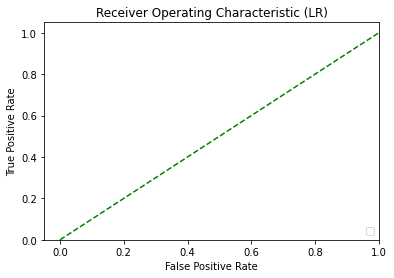

In [ ]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()

## Decision Tree (DT)

In [ ]:
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test_std)
y_dtree_prob = dtree_model.predict_proba(X_test_std)

Finished training within 0.04 seconds


No handles with labels found to put in legend.


Classification report for DT: 
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       487
           1       0.90      0.92      0.91       486

    accuracy                           0.91       973
   macro avg       0.91      0.91      0.91       973
weighted avg       0.91      0.91      0.91       973

Confusion matrix for DT: 
[[435  52]
 [ 38 448]]
Accuracy score for DT: 0.91
Precision score for DT: 0.90
Recall score for DT: 0.92
F1 score for DT: 0.91


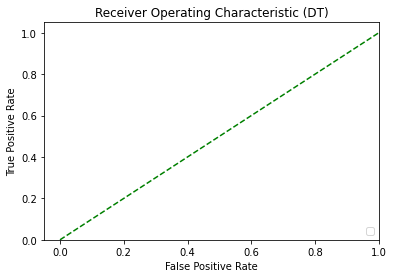

In [ ]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_dtree)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(y_test,y_dtree)))
# calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test,y_dtree)
rec_dtree = recall_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
plt.show()

## Random Forest (RF)

In [ ]:
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_std)

Finished training within 0.96 seconds


No handles with labels found to put in legend.


Classification report for RF: 
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       487
           1       0.94      0.98      0.96       486

    accuracy                           0.95       973
   macro avg       0.96      0.95      0.95       973
weighted avg       0.96      0.95      0.95       973

Confusion matrix for RF: 
[[454  33]
 [ 11 475]]
Accuracy score for RF: 0.95
Precision score for RF: 0.94
Recall score for RF: 0.98
F1 score for RF: 0.96


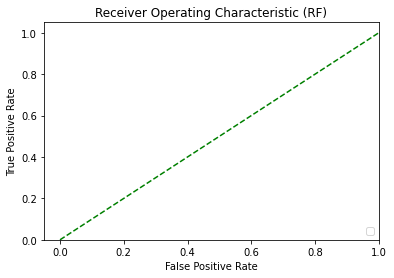

In [ ]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))
# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()

#Support Vector Machine (SVM)

In [ ]:
start = timer.time()
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_svm = svm_model.predict(X_test_std)
y_svm_prob = svm_model.predict_proba(X_test_std)

Finished training within 8.83 seconds


No handles with labels found to put in legend.


Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       487
           1       0.85      0.91      0.88       486

    accuracy                           0.87       973
   macro avg       0.88      0.87      0.87       973
weighted avg       0.88      0.87      0.87       973

Confusion matrix for SVM: 
[[408  79]
 [ 44 442]]
Accuracy score for SVM: 0.87
Precision score for SVM: 0.85
Recall score for SVM: 0.91
F1 score for SVM: 0.88


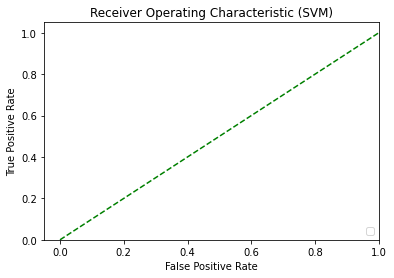

In [ ]:
print("Classification report for SVM: \n{}".format(classification_report(y_test,y_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test,y_svm)))
# calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test,y_svm)
rec_svm = recall_score(y_test,y_svm)
f1_svm = f1_score(y_test,y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))

fig, ax = plt.subplots()

ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
plt.show()

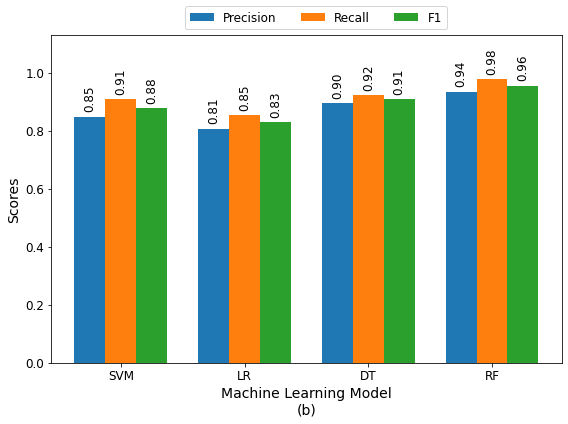

In [ ]:
ml_names = ['SVM',  'LR', 'DT', 'RF']

prec_all = [prec_svm, prec_logit, prec_dtree, prec_ranfor]
rec_all = [rec_svm, rec_logit, rec_dtree, rec_ranfor]
f1_all = [f1_svm, f1_logit, f1_dtree, f1_ranfor]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()

## Q2 Plot the confusion matrix of all these models.

**Logistic Regression (LR)**

In [ ]:
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))


Confusion matrix for LR: 
[[388  99]
 [ 71 415]]


**Decision Tree (DT)**

In [ ]:
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))

Confusion matrix for DT: 
[[435  52]
 [ 38 448]]


**Random Forest (RF)**

In [ ]:
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))


Confusion matrix for RF: 
[[454  33]
 [ 11 475]]


**Singular Vector Machine (SVM)**

In [ ]:
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))


Confusion matrix for SVM: 
[[408  79]
 [ 44 442]]


## Q3 Plot the graph to study the accuracy and F1 score of this models and then choose the best model.

## **F1 score**


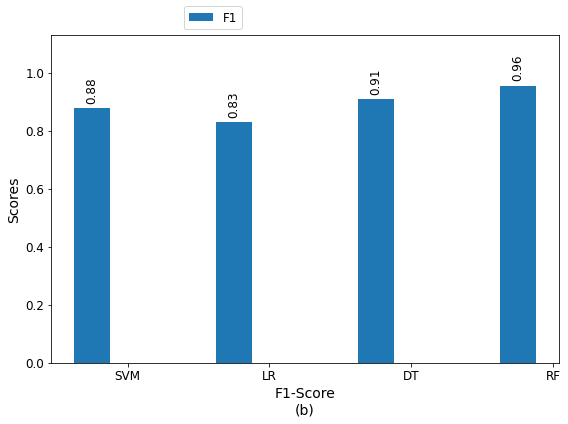

In [ ]:
ml_names = ['SVM',  'LR', 'DT', 'RF']


f1_all = [f1_svm, f1_logit, f1_dtree, f1_ranfor]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r3 = np.arange(len(ml_names))  # the label locations

fig, ax = plt.subplots(figsize=(8,6))

bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("F1-Score\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)

autolabel(bar3)
fig.tight_layout()
fig.savefig("f1.pdf", bbox_inches='tight')
plt.show()

## **Accuracy**


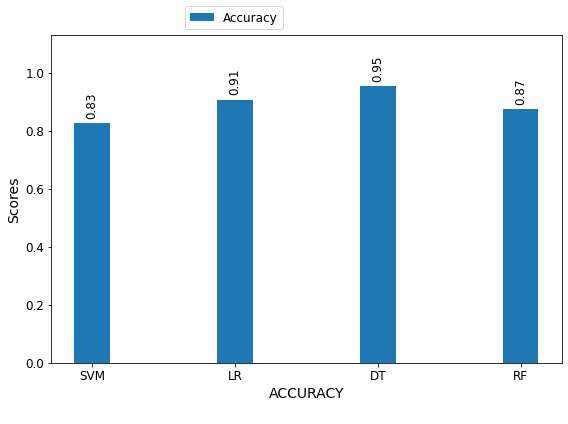

In [ ]:
ml_names = ['SVM',  'LR', 'DT', 'RF']
accuracy_all= [accuracy_score(y_test,y_logit),accuracy_score(y_test,y_dtree),accuracy_score(y_test,y_ranfor),accuracy_score(y_test,y_svm)]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')
        
width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1,accuracy_all , width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r1)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("ACCURACY\n",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
fig.tight_layout()
fig.savefig("Accuracy.pdf", bbox_inches='tight')
plt.show()

## Q4 Explain in the brief why you have chosen this model.

**Logistic Regression (LR)**


1.   Logistic regression is Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
1.  Logistic regression is used for solving the classification problems and can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification.
   



**Random Forest (RF)**


1.  Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique and is a good model if you want high performance with less need for interpretation.
2.  It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.



## **Sample Prediction**

In [ ]:
p=logit_model.predict([[1, 57.00, 0,1,3,0,178.45,34.000000,2 ,2]])
if p==1:
    print("yes,there is high chances of stroke")
else:
    print("the person is healthy")

yes,there is high chances of stroke


In [ ]:
d=dtree_model.predict([[0, 70.00, 1,0,0,0,278.45,25.000000,2 ,1]])
if d==1:
    print("yes,there is high chances of stroke")
else:
    print("the person is healthy")

the person is healthy


In [ ]:
r= ranfor_model.predict([[0, 25.00, 0,1,5,1,300.34,18.000000,2 ,1]])
if r==1:
    print("yes,there is high chances of stroke")
else:
    print("the person is healthy")

the person is healthy
